NAME - Hruturaj Dhake

ROLL NO. - 19104

**BITCOIN CLOSING PRICE PREDICTION**

by Manav Kundal(19185) and Hruturaj Dhake(19104)

In [1]:
#Mounting Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# reading dataset
df = pd.read_csv('/content/drive/MyDrive/DSMLDATASET/train_data.csv')
df_trainlabel = pd.read_csv('/content/drive/MyDrive/DSMLDATASET/train_label.csv')

In [4]:
#Trained data class labels
df_trainlabel

,date,close
0,2017-02-25,1158.00
1,2017-12-28,14450.01
2,2016-08-05,583.00
3,2015-11-21,327.00
4,2015-11-26,352.57
...,...,...
744,2016-01-29,378.68
745,2015-08-02,282.62
746,2017-10-08,4603.49
747,2016-08-07,595.14


In [5]:
# renaming date column from train label
df_trainlabel.rename(columns={'date': 'datetrain'}, inplace=True)
df_trainlabel

,datetrain,close
0,2017-02-25,1158.00
1,2017-12-28,14450.01
2,2016-08-05,583.00
3,2015-11-21,327.00
4,2015-11-26,352.57
...,...,...
744,2016-01-29,378.68
745,2015-08-02,282.62
746,2017-10-08,4603.49
747,2016-08-07,595.14


In [6]:
#Merging Training data and Training data class labels

b = pd.concat([df,df_trainlabel], axis = 1)
print(b)

           date            ts            wp        hi        lo      open  \
0    2017-02-25  1.487981e+09   1172.382511   1189.49   1110.00   1186.91   
1    2017-12-28  1.514419e+09  14292.860031  15489.00  13500.00  15360.01   
2    2016-08-05  1.470355e+09    579.201128    592.87    570.39    587.50   
3    2015-11-21  1.448064e+09    324.774137    328.00    316.33    322.39   
4    2015-11-26  1.448496e+09    342.988280    368.18    328.98    328.99   
..          ...           ...           ...       ...       ...       ...   
744  2016-01-29  1.454026e+09    376.906500    385.05    363.25    379.63   
745  2015-08-02  1.438474e+09    280.488208    282.62    277.33    281.90   
746  2017-10-08  1.507421e+09   4501.692441   4612.00   4420.01   4425.00   
747  2016-08-07  1.470528e+09    594.310253    598.65    587.20    591.70   
748  2017-03-03  1.488499e+09   1278.979821   1294.99   1255.61   1269.17   

      datetrain     close  
0    2017-02-25   1158.00  
1    2017-12-28  14

In [7]:
b.head(20)

,date,ts,wp,hi,lo,open,datetrain,close
0,2017-02-25,1.487981e+09,1172.382511,1189.49,1110.00,1186.91,2017-02-25,1158.00
1,2017-12-28,1.514419e+09,14292.860031,15489.00,13500.00,15360.01,2017-12-28,14450.01
2,2016-08-05,1.470355e+09,579.201128,592.87,570.39,587.50,2016-08-05,583.00
3,2015-11-21,1.448064e+09,324.774137,328.00,316.33,322.39,2015-11-21,327.00
4,2015-11-26,1.448496e+09,342.988280,368.18,328.98,328.99,2015-11-26,352.57
5,2017-09-05,1.504570e+09,4394.633379,4514.95,4242.38,4498.46,2017-09-05,4432.51
6,2015-05-10,1.431216e+09,242.224549,244.89,239.63,242.59,2015-05-10,241.57
7,2017-05-08,1.494202e+09,1640.811810,1713.00,1608.00,1611.10,2017-05-08,1713.00
8,2015-10-20,1.445299e+09,267.869901,272.95,264.38,264.91,2015-10-20,271.14
9,2017-09-04,1.504483e+09,4483.935289,4628.05,4234.16,4626.05,2017-09-04,4498.25


In [8]:
#sorting data in ascending order with respect to time stamp
df_sort = b.sort_values(by=['ts'],ascending = True)

In [9]:
df_sort

,date,ts,wp,hi,lo,open,datetrain,close
696,2015-04-15,1.429056e+09,222.270771,224.52,218.09,221.05,2015-04-15,224.35
185,2015-04-16,1.429142e+09,227.779413,230.75,223.66,224.35,2015-04-16,229.45
287,2015-04-18,1.429315e+09,223.398170,224.04,222.18,223.55,2015-04-18,224.02
647,2015-04-19,1.429402e+09,224.667792,226.72,223.44,224.02,2015-04-19,224.03
280,2015-04-21,1.429574e+09,227.170562,235.89,224.01,225.35,2015-04-21,235.89
...,...,...,...,...,...,...,...,...
739,2017-12-31,1.514678e+09,13386.497711,14280.26,12633.80,12839.98,2017-12-31,13863.13
571,2018-01-01,1.514765e+09,13425.054178,13889.00,12952.50,13863.14,2018-01-01,13480.01
450,2018-01-03,1.514938e+09,14989.939350,15400.00,14628.00,14781.52,2018-01-03,15098.14
367,2018-01-04,1.515024e+09,14851.477880,15400.00,14230.00,15098.23,2018-01-04,15144.99


In [10]:
#Diffrentiation time stamp into Date and Time
import datetime
for i in range(len(df)):
    temp=df['ts'][i]
    df['ts'][i]=datetime.datetime.fromtimestamp(int(temp)).strftime('%Y-%m-%d %H:%M:%S')

print(df)

           date                   ts            wp        hi        lo  \
0    2017-02-25  2017-02-25 00:00:00   1172.382511   1189.49   1110.00   
1    2017-12-28  2017-12-28 00:00:00  14292.860031  15489.00  13500.00   
2    2016-08-05  2016-08-05 00:00:00    579.201128    592.87    570.39   
3    2015-11-21  2015-11-21 00:00:00    324.774137    328.00    316.33   
4    2015-11-26  2015-11-26 00:00:00    342.988280    368.18    328.98   
..          ...                  ...           ...       ...       ...   
744  2016-01-29  2016-01-29 00:00:00    376.906500    385.05    363.25   
745  2015-08-02  2015-08-02 00:00:00    280.488208    282.62    277.33   
746  2017-10-08  2017-10-08 00:00:00   4501.692441   4612.00   4420.01   
747  2016-08-07  2016-08-07 00:00:00    594.310253    598.65    587.20   
748  2017-03-03  2017-03-03 00:00:00   1278.979821   1294.99   1255.61   

         open  
0     1186.91  
1    15360.01  
2      587.50  
3      322.39  
4      328.99  
..        ...  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [11]:
#Splitting timestamp into Date and Time 
df_train = df['ts'].str.split(" ")
df_train

0      [2017-02-25, 00:00:00]
1      [2017-12-28, 00:00:00]
2      [2016-08-05, 00:00:00]
3      [2015-11-21, 00:00:00]
4      [2015-11-26, 00:00:00]
                ...          
744    [2016-01-29, 00:00:00]
745    [2015-08-02, 00:00:00]
746    [2017-10-08, 00:00:00]
747    [2016-08-07, 00:00:00]
748    [2017-03-03, 00:00:00]
Name: ts, Length: 749, dtype: object

In [12]:
#Checking for Null Values
b = pd.DataFrame(b)
print(b.notnull())

     date    ts    wp    hi    lo  open  datetrain  close
0    True  True  True  True  True  True       True   True
1    True  True  True  True  True  True       True   True
2    True  True  True  True  True  True       True   True
3    True  True  True  True  True  True       True   True
4    True  True  True  True  True  True       True   True
..    ...   ...   ...   ...   ...   ...        ...    ...
744  True  True  True  True  True  True       True   True
745  True  True  True  True  True  True       True   True
746  True  True  True  True  True  True       True   True
747  True  True  True  True  True  True       True   True
748  True  True  True  True  True  True       True   True

[749 rows x 8 columns]


In [13]:
b.isnull().sum()

date         0
ts           0
wp           0
hi           0
lo           0
open         0
datetrain    0
close        0
dtype: int64

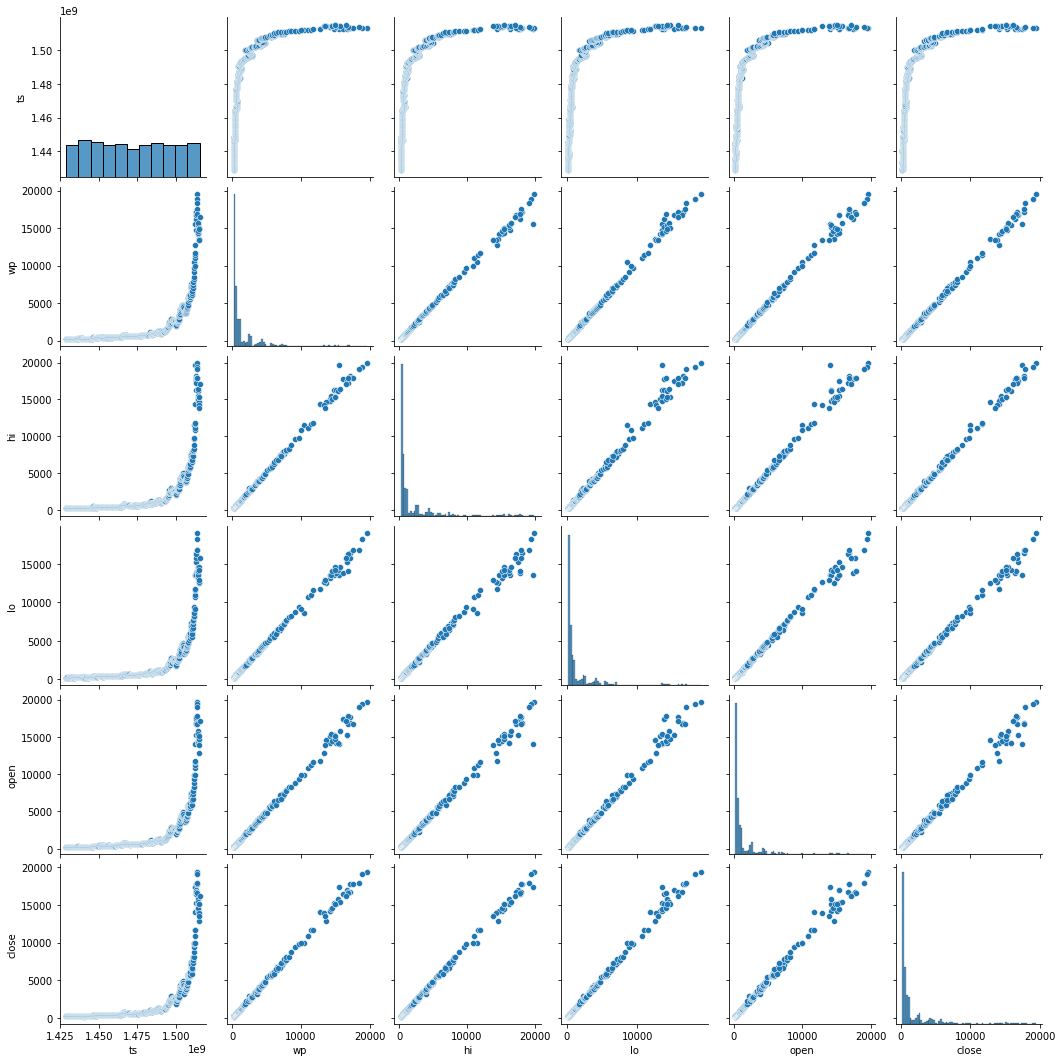

In [14]:
sns.pairplot(df_sort)

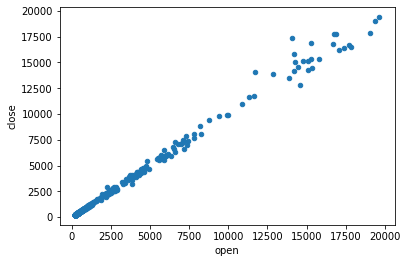

In [15]:
# scatter plot of open and close variable in data
df_sort.plot.scatter(x="open",y="close")

plt.show()

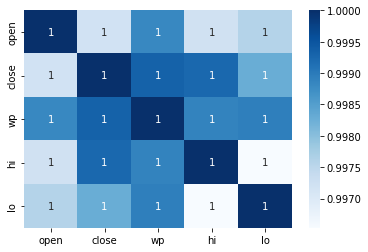

In [16]:
# Creating a matrix 
df_sort[['open','close','wp','hi','lo']].corr()

#plot the correlation matrix in the dataframe.
sns.heatmap(df_sort[['open','close','wp','hi','lo']].corr(), annot=True, cmap = 'Blues')
plt.show()

In [17]:
#Dropping Datetrain colum so that we left with single date column
df_sort = df_sort.drop(columns=['datetrain'])
print(df_sort)

           date            ts            wp        hi        lo      open  \
696  2015-04-15  1.429056e+09    222.270771    224.52    218.09    221.05   
185  2015-04-16  1.429142e+09    227.779413    230.75    223.66    224.35   
287  2015-04-18  1.429315e+09    223.398170    224.04    222.18    223.55   
647  2015-04-19  1.429402e+09    224.667792    226.72    223.44    224.02   
280  2015-04-21  1.429574e+09    227.170562    235.89    224.01    225.35   
..          ...           ...           ...       ...       ...       ...   
739  2017-12-31  1.514678e+09  13386.497711  14280.26  12633.80  12839.98   
571  2018-01-01  1.514765e+09  13425.054178  13889.00  12952.50  13863.14   
450  2018-01-03  1.514938e+09  14989.939350  15400.00  14628.00  14781.52   
367  2018-01-04  1.515024e+09  14851.477880  15400.00  14230.00  15098.23   
35   2018-01-07  1.515283e+09  16526.973583  17115.01  15755.01  17099.00   

        close  
696    224.35  
185    229.45  
287    224.02  
647    224.

In [18]:
df_sort.head()

,date,ts,wp,hi,lo,open,close
696,2015-04-15,1.429056e+09,222.270771,224.52,218.09,221.05,224.35
185,2015-04-16,1.429142e+09,227.779413,230.75,223.66,224.35,229.45
287,2015-04-18,1.429315e+09,223.398170,224.04,222.18,223.55,224.02
647,2015-04-19,1.429402e+09,224.667792,226.72,223.44,224.02,224.03
280,2015-04-21,1.429574e+09,227.170562,235.89,224.01,225.35,235.89


In [19]:
X1 = df_sort.drop(columns=['close'])
X = X1.drop(columns=['date'])

y = df_sort['close']

In [20]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [21]:
import numpy as np
from sklearn                        import metrics, svm
from sklearn.linear_model           import LinearRegression
from sklearn.linear_model           import LogisticRegression
from sklearn.tree                   import DecisionTreeClassifier
from sklearn.neighbors              import KNeighborsClassifier
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.naive_bayes            import GaussianNB
from sklearn.svm                    import SVC

In [22]:
# Using train_test_split model to train with training size 80% of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [23]:
#Regression Model
from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()
# train the model using the training sets
reg.fit(X_train, y_train)

LinearRegression()

In [24]:
# regression coefficients
print('Coefficients: ', reg.coef_)

Coefficients:  [-3.92878759e-08 -1.59374627e-01  8.41054584e-01  6.10927949e-01
 -2.93084995e-01]


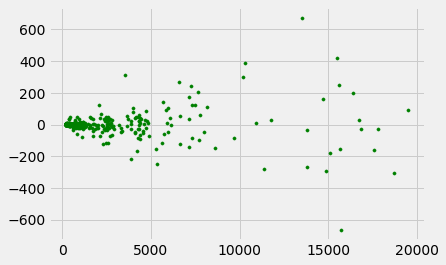

In [25]:
#Data Visualization
#setting plot style
plt.style.use('fivethirtyeight')
# plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
 			color = "green", s = 10, label = 'Train data')

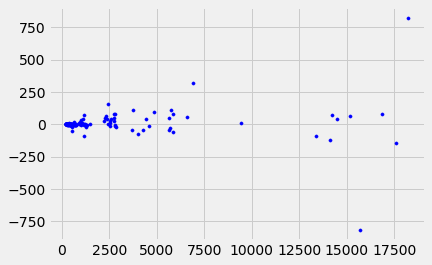

In [26]:
# plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
 			color = "blue", s = 10, label = 'Test data')

In [27]:
y_pred_reg = reg.predict(X_test)

In [28]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
print("MAE",mean_absolute_error(y_test,y_pred_reg))
print("MSE",mean_squared_error(y_test,y_pred_reg))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_reg)))
print("MAPE",mean_absolute_percentage_error(y_test,y_pred_reg))
r2 = r2_score(y_test,y_pred_reg)
print("r2 value: ",r2)

MAE 31.632425460174392
MSE 10958.470241738512
RMSE 104.68271223912052
MAPE 0.010669518712140894
r2 value:  0.9992239405017732


In [29]:
clf = svm.SVR()
clf.fit(X_train, y_train)
print("SVR")

SVR


In [30]:
y_pred_clf = clf.predict(X_test)

In [31]:
print("MAE",mean_absolute_error(y_test,y_pred_clf))
print("MSE",mean_squared_error(y_test,y_pred_clf))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_clf)))
print("MAPE",mean_absolute_percentage_error(y_test,y_pred_clf))
r2 = r2_score(y_test,y_pred_clf)
print("r2 value: ",r2)

MAE 1825.7932437237926
MSE 16569690.275676418
RMSE 4070.588443416556
MAPE 0.7560305089430932
r2 value:  -0.17343618565824603


In [32]:
clf2 = linear_model.SGDRegressor()
clf2.fit(X_train, y_train)
print("SGD Regressor")

SGD Regressor


In [33]:
y_pred_clf2 = clf2.predict(X_test)

In [34]:
print("MAE",mean_absolute_error(y_test,y_pred_clf2))
print("MSE",mean_squared_error(y_test,y_pred_clf2))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_clf2)))
print("MAPE",mean_absolute_percentage_error(y_test,y_pred_clf2))
r2 = r2_score(y_test,y_pred_clf2)
print("r2 value: ",r2)

MAE 1.4081526637332767e+27
MSE 1.9835465331518404e+54
RMSE 1.4083843698194894e+27
MAPE 2.517716915310294e+24
r2 value:  -1.4047126042869354e+47


In [35]:
clf3 = linear_model.BayesianRidge()
clf3.fit(X_train, y_train)
print("BayesianRidge")
# formulates linear regression using probability distributors rather than point estimates. 

BayesianRidge


In [36]:
y_pred_clf3 = clf3.predict(X_test)

In [37]:
print("MAE",mean_absolute_error(y_test,y_pred_clf3))
print("MSE",mean_squared_error(y_test,y_pred_clf3))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_clf3)))
print("MAPE",mean_absolute_percentage_error(y_test,y_pred_clf3))
r2 = r2_score(y_test,y_pred_clf3)
print("r2 value: ",r2)

MAE 31.31487222776736
MSE 10525.717475050902
RMSE 102.59491934326428
MAPE 0.010600696249449275
r2 value:  0.9992545872880092


In [38]:
clf4 = linear_model.LassoLars()
clf4.fit(X_train, y_train)
print("Lassolars")
# default alpha = 1 , whereas linear regressor have alpha = 0 

Lassolars


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


In [39]:
y_pred_clf4 = clf4.predict(X_test)

In [40]:
print("MAE",mean_absolute_error(y_test,y_pred_clf4))
print("MSE",mean_squared_error(y_test,y_pred_clf4))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_clf4)))
print("MAPE",mean_absolute_percentage_error(y_test,y_pred_clf4))
r2 = r2_score(y_test,y_pred_clf4)
print("r2 value: ",r2)

MAE 34.77970639149973
MSE 5413.5281934523155
RMSE 73.57668240313853
MAPE 0.027747697073750254
r2 value:  0.9996166234993781


In [41]:
df_testdata = pd.read_csv('/content/drive/MyDrive/DSMLDATASET/test_data.csv')
df_testdata

,date,ts,wp,hi,lo,open
0,2016-07-16,1.468627e+09,667.010196,669.99,662.01,667.48
1,2016-09-20,1.474330e+09,608.817753,609.92,605.60,608.60
2,2017-02-27,1.488154e+09,1189.531393,1198.99,1176.00,1184.91
3,2016-10-08,1.475885e+09,618.950957,620.00,617.55,618.11
4,2015-12-08,1.449533e+09,395.036331,418.94,386.69,394.73
...,...,...,...,...,...,...
245,2017-02-22,1.487722e+09,1124.780081,1140.00,1104.90,1129.67
246,2017-01-24,1.485216e+09,908.492474,923.00,880.00,911.78
247,2016-08-18,1.471478e+09,575.128134,576.99,573.00,574.45
248,2015-11-11,1.447200e+09,316.034258,341.75,293.32,337.14


In [42]:
z = df_testdata
z = z.drop(columns = ['date'])
z

,ts,wp,hi,lo,open
0,1.468627e+09,667.010196,669.99,662.01,667.48
1,1.474330e+09,608.817753,609.92,605.60,608.60
2,1.488154e+09,1189.531393,1198.99,1176.00,1184.91
3,1.475885e+09,618.950957,620.00,617.55,618.11
4,1.449533e+09,395.036331,418.94,386.69,394.73
...,...,...,...,...,...
245,1.487722e+09,1124.780081,1140.00,1104.90,1129.67
246,1.485216e+09,908.492474,923.00,880.00,911.78
247,1.471478e+09,575.128134,576.99,573.00,574.45
248,1.447200e+09,316.034258,341.75,293.32,337.14


In [43]:
z_pred_reg = reg.predict(z)
print(z_pred_reg)

[  666.00355099   607.32616472  1189.23754199   618.64126951
   410.69095863  5919.56139265  2718.55012582   434.93117044
   607.31783358   732.1583904   1345.65056857   611.12719124
   959.12243193  6377.19681066   458.7376683    433.53212267
   715.34178618   604.88117018   585.70022275   792.02834972
  1217.71049821   394.00618517   458.34454189   739.261264
  1117.64062071   294.28794357   764.77563293   459.89095803
   462.37820421   659.36322084  2593.10486186  2767.20416836
   439.58057171   610.64780452   456.21537369 10489.00987844
   776.97385578   256.69430559   433.86271625   415.03431488
  6164.40796676   664.49117546   239.55186368   677.1328079
   603.64448943  1244.75967817   611.12172859   584.57854961
   986.19318801  3938.44428013  4208.76286356  1037.86110189
  2555.21814163   575.12137738   418.61261386   672.59523865
  4189.75969967   243.19235949  8243.52761393   238.15870086
  2424.50371435   436.05806837   223.25020983   919.9013651
   237.66324904   783.481660

In [44]:
z_pred_clf = clf.predict(z)
print(z_pred_clf)

[630.70990876 630.79162106 630.98967669 630.81390592 630.43638643
 631.28272394 631.17768837 630.53042036 630.80400159 630.86713967
 631.06391472 630.77181204 630.92531922 631.29383994 630.44999398
 630.4710257  630.84980821 630.79904939 630.65791213 630.90303865
 631.04412043 630.49700899 630.63191535 630.87085348 630.98225158
 630.25465266 630.88323266 630.44504567 630.63315326 630.72105124
 631.12575817 631.17027089 630.45494242 630.77428817 630.63067744
 631.33211963 630.89808724 630.36960099 630.45865384 630.55888527
 631.29136981 630.71609902 630.34858173 630.71114681 630.79657328
 631.05772922 630.81142985 630.66038808 630.96863833 631.23454216
 631.25307594 631.01566283 631.12823144 630.76562169 630.53289545
 630.67895798 631.20859023 630.16697041 631.3210076  630.17931565
 631.12452152 630.60096866 630.15709531 630.95502441 630.15215814
 630.89561151 630.52052022 630.74086027 631.11833814 631.06144055
 630.90180081 631.06638887 630.18178488 631.10349707 630.98472664
 630.54898

In [45]:
z_pred_clf2 = clf2.predict(z)
print(z_pred_clf2)

[1.40371146e+27 1.40916180e+27 1.42237476e+27 1.41064826e+27
 1.38546106e+27 1.44194645e+27 1.43492707e+27 1.39173722e+27
 1.40998761e+27 1.41419924e+27 1.42732962e+27 1.40784051e+27
 1.41808055e+27 1.44268968e+27 1.38636945e+27 1.38777333e+27
 1.41304311e+27 1.40965729e+27 1.40024306e+27 1.41659409e+27
 1.42600832e+27 1.38950753e+27 1.39850886e+27 1.41444699e+27
 1.42187927e+27 1.37332166e+27 1.41527280e+27 1.38603913e+27
 1.39859144e+27 1.40445469e+27 1.43145867e+27 1.43443158e+27
 1.38669978e+27 1.40800567e+27 1.39842628e+27 1.44524969e+27
 1.41626377e+27 1.38100169e+27 1.38694752e+27 1.39363658e+27
 1.44252452e+27 1.40412436e+27 1.37959781e+27 1.40379404e+27
 1.40949213e+27 1.42691671e+27 1.41048310e+27 1.40040822e+27
 1.42097088e+27 1.43872579e+27 1.43996451e+27 1.42410896e+27
 1.43162383e+27 1.40742760e+27 1.39190238e+27 1.40164693e+27
 1.43699159e+27 1.36745841e+27 1.44450646e+27 1.36828422e+27
 1.43137609e+27 1.39644433e+27 1.36679776e+27 1.42006249e+27
 1.36646744e+27 1.416098

In [46]:
z_pred_clf3 = clf3.predict(z)
z_pred_clf3

array([  666.06561769,   607.41995304,  1189.3667747 ,   618.72631154,
         410.48747324,  5919.3914518 ,  2718.4311918 ,   434.95355157,
         607.3807137 ,   732.34656094,  1345.68411005,   611.16453238,
         958.68130027,  6376.11295757,   458.78131021,   433.52629397,
         715.43291556,   604.9774883 ,   585.65832602,   792.14083764,
        1217.82618711,   394.0124095 ,   458.37573203,   739.36848469,
        1117.64779984,   294.19395014,   764.86633954,   459.90838597,
         462.39657696,   659.38813098,  2593.07899877,  2767.29372282,
         439.5928913 ,   610.70697196,   456.25207951, 10486.21087228,
         777.09123272,   256.65976551,   433.78553312,   415.05419085,
        6161.51526826,   664.54887282,   239.52992919,   677.15141405,
         603.72621316,  1244.91270863,   611.21641176,   584.63739523,
         986.23879365,  3937.62292257,  4208.6150617 ,  1038.02828083,
        2555.47866532,   575.19571192,   418.66979424,   672.68230177,
      

In [47]:
z_pred_clf4 = clf4.predict(z)
z_pred_clf4

array([  677.33442277,   619.21400154,  1196.27172585,   629.99189351,
         418.10609003,  5918.68968096,  2730.41325665,   448.00500818,
         618.42697139,   747.81998778,  1353.10217791,   620.06215985,
         976.28382684,  6286.36563436,   471.94705572,   445.66402082,
         724.33823949,   615.79201938,   593.30501002,   802.24130112,
        1226.88643417,   405.82942104,   470.42395394,   751.77937463,
        1119.15698813,   306.38194532,   776.48051243,   468.34325519,
         473.64981518,   670.53522444,  2565.71908209,  2777.92430459,
         450.4515573 ,   620.94113254,   468.48857253, 10286.60979773,
         787.76944191,   268.94817348,   450.54970293,   427.48323277,
        6028.03461519,   676.07377693,   251.41408574,   685.34080297,
         615.0402914 ,  1253.02092858,   623.16615631,   593.95970825,
         996.77139573,  3974.45809026,  4193.20840762,  1042.90795435,
        2546.05756325,   586.37427563,   431.58766235,   691.54778367,
      

In [48]:
z_pred_clf4.shape

(250,)

Using MinMaxScalar 

In [61]:
X1 = df_sort.drop(columns=['close'])
X = X1.drop(columns=['date'])

y = df_sort['close']

In [62]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [63]:
from sklearn.svm import SVR
scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    best_svr.fit(X_train, y_train)
    scores.append(best_svr.score(X_test, y_test))

In [64]:
y_pred_clf1 = best_svr.predict(X_test)

In [65]:
print("MAE",mean_absolute_error(y_test,y_pred_clf1))
print("MSE",mean_squared_error(y_test,y_pred_clf1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_clf1)))
print("MAPE",mean_absolute_percentage_error(y_test,y_pred_clf1))
r2 = r2_score(y_test,y_pred_clf1)
print("r2 value: ",r2)

MAE 1787.8441269049626
MSE 18368257.230363715
RMSE 4285.820485083774
MAPE 0.6752351238931389
r2 value:  -0.15092834531874688


In [66]:
reg = linear_model.LinearRegression()
# train the model using the training sets
reg.fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)
print("MAE",mean_absolute_error(y_test,y_pred_reg))
print("MSE",mean_squared_error(y_test,y_pred_reg))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_reg)))
print("MAPE",mean_absolute_percentage_error(y_test,y_pred_reg))
r2 = r2_score(y_test,y_pred_reg)
print("r2 value: ",r2)

MAE 2294.5992182333143
MSE 16171211.057300394
RMSE 4021.3444340544115
MAPE 2.5931961665558747
r2 value:  -0.013264620075795097


In [55]:
clf2 = linear_model.SGDRegressor()
clf2.fit(X_train, y_train)
print("SGD Regressor") 

SGD Regressor


In [56]:
y_pred_clf2 = clf2.predict(X_test)

In [57]:
print("MAE",mean_absolute_error(y_test,y_pred_clf2))
print("MSE",mean_squared_error(y_test,y_pred_clf2))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_clf2)))
print("MAPE",mean_absolute_error(y_test,y_pred_clf2))
r2 = r2_score(y_test,y_pred_clf2)
print("r2 value: ",r2)

MAE 2274.4695366104806
MSE 16221528.53941834
RMSE 4027.5958758815837
MAPE 2274.4695366104806
r2 value:  -0.016417440493557978


In [59]:
clf3 = linear_model.BayesianRidge()
clf3.fit(X_train, y_train)
print("BayesianRidge")
print('r2 value: {}'.format(clf3.score(X_test, y_test))) 

BayesianRidge
r2 value: -0.007575407367865328


In [60]:
clf4 = linear_model.LassoLars()
clf4.fit(X_train, y_train)
print("Lassolars")
print('r2 value: {}'.format(clf4.score(X_test, y_test))) 

Lassolars
r2 value: -0.010219472413870445


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


It is observed that applying MinMaxScalar results in reducing the r2 value and hence increasing the error values.